In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,_),(x_test,_) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

#axis = -1 means to move right
#axis =1 means to move at the start left
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train_shape : {x_train.shape}")
print(f"x_test_shape : {x_test.shape}")

x_train_shape : (60000, 28, 28, 1)
x_test_shape : (10000, 28, 28, 1)


In [7]:
encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(64,(3,3), activation='relu', strides=2, padding='same'),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

decoder = models.Sequential([layers.InputLayer(input_shape=(64,)),
                            layers.Dense(7*7*64, activation='relu'),
                            layers.Reshape((7,7,64)),
                            layers.Conv2DTranspose(64,(3,3), activation='relu', strides=2, padding='same'),
                            layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                            layers.Conv2DTranspose(1,(3,3), activation='sigmoid', padding='same')])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
decoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
#train the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.1634 - val_loss: 0.0874
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0819 - val_loss: 0.0768
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0755 - val_loss: 0.0729
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.0726 - val_loss: 0.0713
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.0710 - val_loss: 0.0697
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0701 - val_loss: 0.0693
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0694 - val_loss: 0.0686
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.0688 - val_loss: 0.0682
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0683 - val_loss: 0.0677
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.0679 - val_loss: 0.0675


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


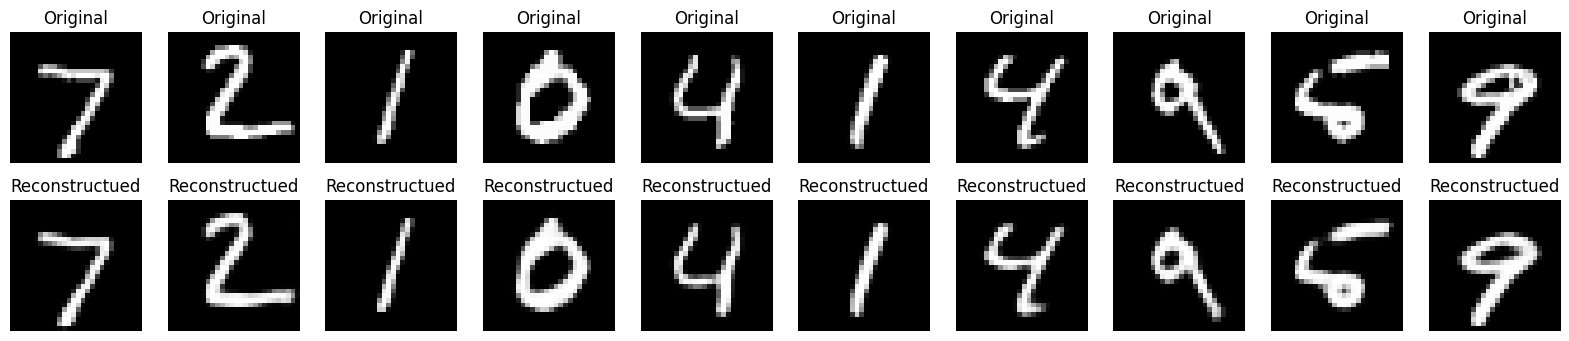

In [13]:
# print the model result
decoded_images = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructued")
    plt.gray()
    ax.axis('off')

plt.show()

In [14]:
# save the model
autoencoder.save('autoencoder_mnist.keras')